In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import config as cfg
from dataload import load_data

In [93]:
import pandas as pd
from scipy import signal
from scipy.io import wavfile
import numpy as np

In [52]:
import os
import sys
import re

In [80]:
def strip_silence(arr):
    m = np.where(np.abs(arr) > 0)[0]
    return arr[m[0]:m[-1] + 1]

In [81]:
NOISE_DIR = './data/train/audio/_background_noise_'
NOISE_CLIP_DIR = './data/noise_clips'

In [82]:
noise_files = os.listdir(NOISE_DIR)
noise_files.remove('README.md')
noise_files.remove('.DS_Store')

## Generate random 1 sec samples from the provided noise files

In [209]:
np.random.seed(42)

num_samples_per_file = 20
num_audio_samples = 16000
noise_matrix = np.zeros([len(noise_files) * num_samples_per_file, num_audio_samples])

i = 0
for f in noise_files:
    print f
    
    # Load the noise files
    sr, wave = wavfile.read(os.path.join(NOISE_DIR, f))
    wave = strip_silence(wave)
    wave = wave / cfg.MAXAMPS
    
    # Select random 1 sec samples
    for _ in xrange(num_samples_per_file):
        idx = np.random.randint(len(wave) - num_audio_samples)
        wave_1sec = wave[idx:idx + num_audio_samples]
        
        # Scale to [-1, 1] so we can choose the amount of noise to apply in training
        wave_1sec_s = 2.0 * (wave_1sec - wave_1sec.min()) / (wave_1sec.max() - wave_1sec.min()) - 1.0
        
        noise_matrix[i] += wave_1sec_s
        
        i += 1

pink_noise.wav
white_noise.wav
dude_miaowing.wav
doing_the_dishes.wav
exercise_bike.wav
running_tap.wav


In [210]:
noise_matrix.shape

(120, 16000)

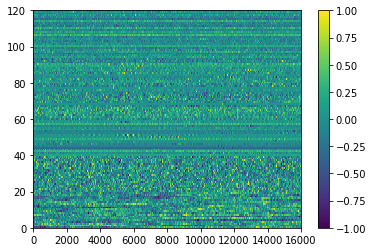

In [211]:
plt.pcolormesh(noise_matrix)
plt.colorbar();

In [212]:
# Export to file
np.savetxt(os.path.join(NOISE_CLIP_DIR, 'noise_clips.csv'), noise_matrix, delimiter=',')